# <div style="text-align: center;"> <span style="color: red; font-weight: bold;">Twitter Entity Sentiment Analysis</span> </div> 

## 
---
**Name** : **ANJALI J**

**Company** : **Prodigy InfoTech**

**Task 4**

---

## <span style="color:blue"><strong>Objective</strong></span>

### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## <span style="color:blue"><strong>About the Dataset</strong></span>

#### Twitter entity sentiment analysis involves analyzing tweets to determine the sentiment associated with specific entities mentioned in the text. This analysis can help identify sentiment patterns, such as positive, neutral, or negative opinions, related to specific entities.

## <span style="color:blue"><strong>Importing Required Libraries</strong></span>

In [32]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## <span style="color:blue"><strong>Loading the Dataset</strong></span>

In [34]:
column_names=['Tweet_ID','Entity','Sentiment','Tweet Content']

In [35]:
train_data=pd.read_csv("twitter_training.csv", header=None, names=column_names)
val_data=pd.read_csv("twitter_validation.csv", header=None, names=column_names)

## <span style="color:blue"><strong>Overview of the Dataset</strong></span>

In [36]:
train_data.shape

(74682, 4)

#### The training dataset contain 74682 rows and 4 columns.

In [37]:
val_data.shape

(1000, 4)

In [38]:
train_data.head()

,Tweet_ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [39]:
val_data.head()

,Tweet_ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [41]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [42]:
train_data.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [43]:
val_data.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [44]:
train_data.duplicated().sum()

2700

In [45]:
val_data.duplicated().sum()

0

#### There are many null values and duplicate values. These are to be treated.

## <span style="color:blue"><strong>Preprocess the dataset</strong></span>

In [46]:
train_data=train_data.drop_duplicates()

In [47]:
train_data.duplicated().sum()

0

In [48]:
train_data=train_data.dropna()

In [49]:
train_data.isnull().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [50]:
train_data.shape

(71656, 4)

#### All null values and duplicated are removed.

## <span style="color:blue"><strong>Preprocess the Text data</strong></span>

In [ ]:
# Remove URLs
# Remove mentions and hashtags
# Remove special characters
# Convert to lowercase
# Tokenize
# Lemmatize and remove stopwords

In [51]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  
    text = re.sub(r"@\w+|#", '', text)  
    text = re.sub(r"[^A-Za-z0-9 ]+", '', text)  
    text = text.lower()  
    tokens = word_tokenize(text)  
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  
    return ' '.join(tokens)

# Apply cleaning
train_data['cleaned_text'] = train_data['Tweet Content'].apply(clean_tweet)
val_data['cleaned_text'] = val_data['Tweet Content'].apply(clean_tweet)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## <span style="color:blue"><strong>Perform Sentiment Analysis</strong></span>

In [52]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Analyze sentiment
train_data['sentiment_score'] = train_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
train_data['predicted_sentiment'] = train_data['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

## <span style="color:blue"><strong>Validate the Model</strong></span>

In [53]:
# Evaluate on validation set
val_data['sentiment_score'] = val_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
val_data['predicted_sentiment'] = val_data['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Classification report
print(classification_report(val_data['Sentiment'], val_data['predicted_sentiment']))

              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       172
    Negative       0.42      0.62      0.50       266
     Neutral       0.39      0.16      0.23       285
    Positive       0.41      0.71      0.52       277

    accuracy                           0.41      1000
   macro avg       0.30      0.37      0.31      1000
weighted avg       0.34      0.41      0.34      1000



C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## <span style="color:blue"><strong>Visualize Sentiment Patterns</strong></span>

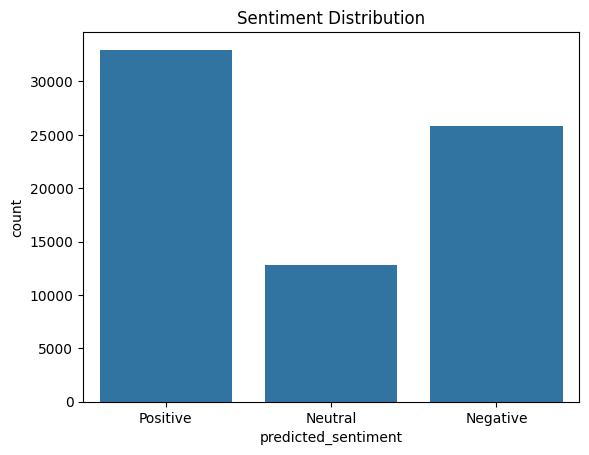

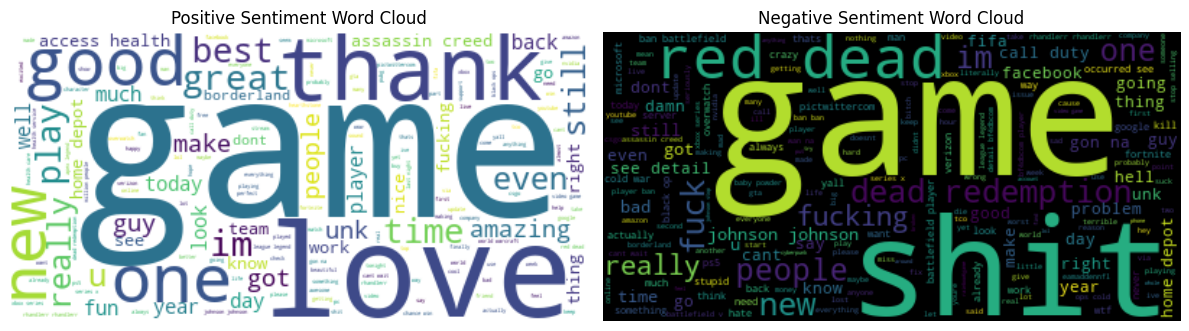

In [54]:
# Bar plot for sentiment distribution
sns.countplot(data=train_data, x='predicted_sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.show()

# Word clouds
positive_text = ' '.join(train_data[train_data['predicted_sentiment'] == 'Positive']['cleaned_text'])
negative_text = ' '.join(train_data[train_data['predicted_sentiment'] == 'Negative']['cleaned_text'])

positive_wc = WordCloud(background_color='white').generate(positive_text)
negative_wc = WordCloud(background_color='black').generate(negative_text)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()